## South African Portfolio data

In [129]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
#import pandas_datareader as web
from scipy.stats import skew, kurtosis
import seaborn as sns
from scipy.stats import norm  # You can choose a different distribution if needed
import matplotlib.pyplot as plt
from collections import deque
import datetime
import scipy.stats as stats
import statistics as st
import matplotlib.pyplot as plt

from scipy.stats import kstest


## $\underline{\text{Section 1:}}$   Data download and plots of Shares contained in SA portfolio

**The code below downmload the data from yahoo finance**

In [ ]:
data = pd.read_excel('neokevin11.xlsx')
df_foschine =data['Foscine'].drop(data['Foscine'].index[-1]).values.tolist()

In [ ]:
def download_portfolio_adj_close(tickers, start_date, end_date):
  # download_portfolio_adj_close: is the function that takes in 3 variebles which are yahoo tickers, start date and end date
  #yf.downoad : download the adjusted close prices
    data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
    return data

def export_to_csv(data, filename):
    data.to_csv(filename)

tickers1 = ['ABG.JO', 'NED.JO', 'PIK.JO', 'SBK.JO']
start_date = '2013-08-01'
end_date = '2023-08-01'
SA_portfolio_prices = download_portfolio_adj_close(tickers1, start_date, end_date)



[*********************100%%**********************]  4 of 4 completed


### **SA_portfolio_prices** is the function that contains SA portfolio adjusted close prices from yahoo finance. The share that are contained in SA portfolio are **Nedbank**, **Absa bank**, **Pick n Pay**, **Standard bank** and **Foschini**

In [ ]:
SA_portfolio_prices['TFG.JO'] = df_foschine
SA_portfolio_prices.head()

,ABG.JO,NED.JO,PIK.JO,SBK.JO,TFG.JO
Date,,,,,
2013-08-01,7123.025391,10094.554688,2839.341309,6499.644531,6112.089355
2013-08-02,7191.175293,10104.125977,2853.976807,6500.797852,6124.679199
2013-08-05,7101.316895,10216.141602,2807.142334,6558.325684,6045.550293
2013-08-06,7087.687012,10075.979492,2723.718262,6507.124023,5875.902832
2013-08-07,7029.631836,10183.492188,2671.029541,6529.561035,5842.933594


### This section contains all plots contained in SA portfolio

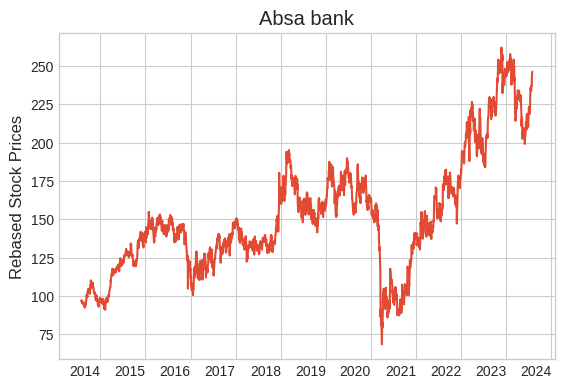

In [ ]:
((SA_portfolio_prices['ABG.JO']/7403.312012)*100).plot()
plt.xlabel('')
plt.ylabel('Rebased Stock Prices')
plt.title('Absa bank')
plt.xticks(rotation=0)
plt.show()

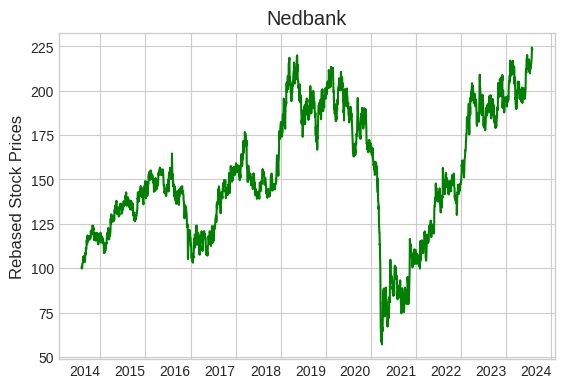

In [ ]:
((SA_portfolio_prices['NED.JO']/10094.555664)*100).plot(color='green')
plt.ylabel('Rebased Stock Prices')
plt.xlabel('')
plt.title('Nedbank')
plt.xticks(rotation=0)
plt.show()

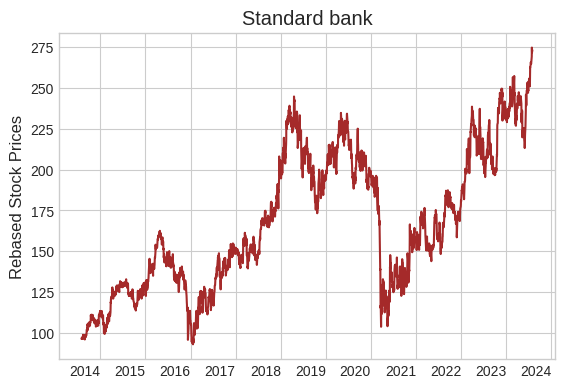

In [ ]:
((SA_portfolio_prices['SBK.JO']/6741.217285)*100).plot(color='brown')
plt.xlabel('')
plt.ylabel('Rebased Stock Prices')
plt.title('Standard bank')
plt.xticks(rotation=0)
plt.show()

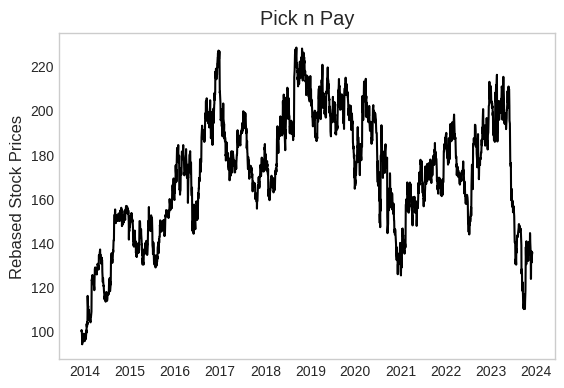

In [ ]:
((SA_portfolio_prices['PIK.JO']/2839.341064)*100).plot(color='black')
plt.xlabel('')
plt.ylabel('Rebased Stock Prices')
plt.title('Pick n Pay')
plt.xticks(rotation=0)
plt.grid(False)
plt.show()

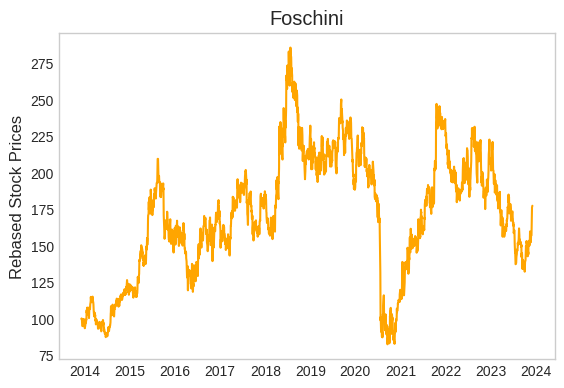

In [ ]:
((SA_portfolio_prices['TFG.JO']/6112.089355)*100).plot(color='orange')
plt.xlabel('')
plt.ylabel('Rebased Stock Prices')
plt.title('Foschini')
plt.xticks(rotation=0)
plt.grid(False)
plt.show()

## $\underline{\text{Section 2:}}$ South African Portfolio return Shares

In [ ]:
def df_portfolio_return(df):
  # df_portfolio_return : is the fuction that takes in dataframe 'df' of prices and return the daily retuns of share prices contined of dataframe df.


    df_return = df.pct_change() # this line compute the percentage change of dataframe df
    df_return = df_return.drop('2013-08-01') # df_return: line remove the first empty row of a return dataframe


    returns_weight = [.2,.2,.2,.2,.2] # This are weights of portfolio return shares and all equal to 20%.
    df_return['Portfolio return'] = df_return.multiply(returns_weight, axis=1).sum(axis=1) # This line multiply all portfolio shares by weights.
    return df_return # This line returns the vector of portfolio returns

In [ ]:
# SA portfolio return test.

SA_portfolio_return = df_portfolio_return(SA_portfolio_prices)
SA_portfolio_return.head()

,ABG.JO,NED.JO,PIK.JO,SBK.JO,TFG.JO,Portfolio return
Date,,,,,,
2013-08-02,0.009568,0.000948,0.005155,0.000177,0.002060,0.003582
2013-08-05,-0.012496,0.011086,-0.016410,0.008849,-0.012920,-0.004378
2013-08-06,-0.001919,-0.013720,-0.029719,-0.007807,-0.028062,-0.016245
2013-08-07,-0.008191,0.010670,-0.019344,0.003448,-0.005611,-0.003806
2013-08-08,0.003591,0.017081,0.029863,-0.003612,-0.006361,0.008112


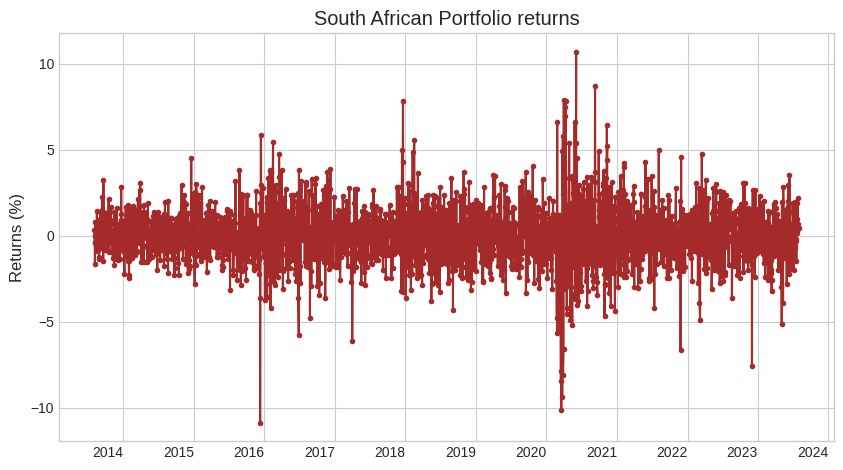

In [ ]:
## Portfolio return plots
(SA_portfolio_return['Portfolio return']*100).plot(color='brown',marker='.',figsize=(10,6))
plt.ylabel('Returns (%)')
#plt.figure(figsize=(10,6)
plt.title('South African Portfolio returns')
plt.xlabel('')
plt.xticks(rotation=0)
plt.show()

Text(0, 0.5, 'Returns (%)')

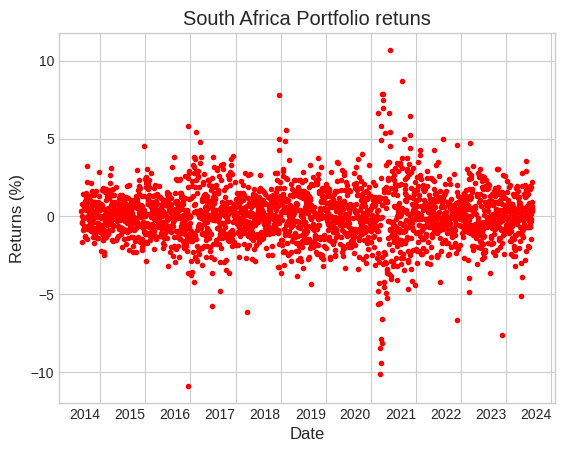

In [ ]:
date = SA_portfolio_return.index

# To draw scatter time series plot of the given dataframe
plt.plot_date(date,SA_portfolio_return["Portfolio return"]*100,ms=3, color = 'red', label='Returns')


# rotating the x-axis tick labels at 30degree towards right
plt.xticks(rotation=30, ha='right')

# Giving title to the chart using plt.title
plt.title('South Africa Portfolio retuns')
#plt.legend(loc='best')
# Providing x and y label to the chart
plt.xlabel('')
plt.xticks(rotation=0)
plt.xlabel('Date')
plt.ylabel('Returns (%)')

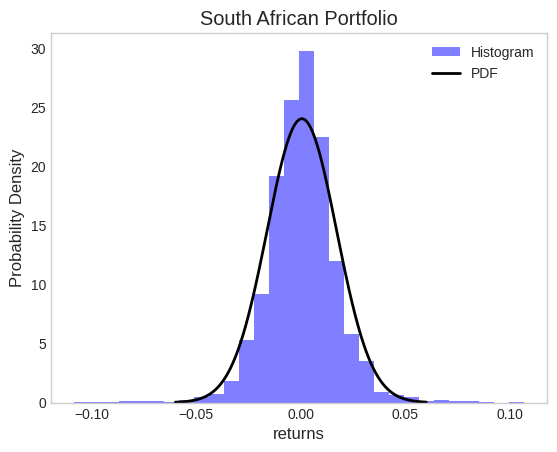

In [ ]:
# Create a histogram of Histogram
plt.hist(SA_portfolio_return['Portfolio return'], bins=30, density=True, alpha=0.5, color='b', label='Histogram')

# Fit a probability density function (PDF)
mu, std = norm.fit(SA_portfolio_return['Portfolio return'])
xmin, xmax = plt.xlim()
x = np.linspace(-0.06, 0.06, 10000)
p = norm.pdf(x, mu, std)

# Plot the PDF
plt.plot(x, p, 'k', linewidth=2, label='PDF')

# Add labels and a legend
plt.xlabel('returns')
plt.ylabel('Probability Density')
plt.title("South African Portfolio")
plt.grid(False)
plt.legend()

# Show the plot
plt.show()

## Correlation Matrix

In [ ]:
corr = SA_portfolio_return[['ABG.JO', 'NED.JO', 'PIK.JO', 'SBK.JO', 'TFG.JO']].corr(method = 'pearson')
corr

,ABG.JO,NED.JO,PIK.JO,SBK.JO,TFG.JO
ABG.JO,1.000000,0.794519,0.308409,0.784030,0.564953
NED.JO,0.794519,1.000000,0.308643,0.811070,0.570990
PIK.JO,0.308409,0.308643,1.000000,0.358557,0.371682
SBK.JO,0.784030,0.811070,0.358557,1.000000,0.560620
TFG.JO,0.564953,0.570990,0.371682,0.560620,1.000000


In [ ]:
SA_portfolio_return.shape

(2542, 6)

### Testing for Normailty of returns using JB Test

In [ ]:

print('Portfolio: ', stats.jarque_bera(SA_portfolio_return['Portfolio return']))
print('..')
print('Absa:      ', stats.jarque_bera(SA_portfolio_return['ABG.JO']))
print('..')
print('Nedbank:   ', stats.jarque_bera(SA_portfolio_return['NED.JO']))
print('..')
print('Pick n Pay:', stats.jarque_bera(SA_portfolio_return['PIK.JO']))
print('..')
print('Stabdard:  ', stats.jarque_bera(SA_portfolio_return['SBK.JO']))
print('..')
print('Foschini:  ', stats.jarque_bera(SA_portfolio_return['TFG.JO']))
print('..')

Portfolio:  SignificanceResult(statistic=2190.7674637835726, pvalue=0.0)
..
Absa:       SignificanceResult(statistic=6340.384891634529, pvalue=0.0)
..
Nedbank:    SignificanceResult(statistic=5390.913816620088, pvalue=0.0)
..
Pick n Pay: SignificanceResult(statistic=2653.8243035757305, pvalue=0.0)
..
Stabdard:   SignificanceResult(statistic=2313.8982833849627, pvalue=0.0)
..
Foschini:   SignificanceResult(statistic=1473.9791673182847, pvalue=0.0)
..


In [ ]:
print('Portfolio:  ', kstest(( SA_portfolio_return['Portfolio return']), 'norm'))
print('..')
print('Absa:       ', kstest(( SA_portfolio_return['ABG.JO']), 'norm'))
print('..')
print('Nedbank:    ', kstest((SA_portfolio_return['NED.JO']), 'norm'))
print('..')
print('Pick n Pay: ', kstest((SA_portfolio_return['PIK.JO']), 'norm'))
print('..')
print('Standard:   ', kstest((SA_portfolio_return['SBK.JO']), 'norm'))
print('..')
print('Foschini:   ', kstest((SA_portfolio_return['TFG.JO']), 'norm'))
print('..')

Portfolio:   KstestResult(statistic=0.47455018916399166, pvalue=0.0, statistic_location=-0.049021566210937124, statistic_sign=-1)
..
Absa:        KstestResult(statistic=0.47094968093984857, pvalue=0.0, statistic_location=-0.05312162300652001, statistic_sign=-1)
..
Nedbank:     KstestResult(statistic=0.4694567765718874, pvalue=0.0, statistic_location=-0.06180856322088979, statistic_sign=-1)
..
Pick n Pay:  KstestResult(statistic=0.4743410288651294, pvalue=0.0, statistic_location=-0.04855921826257148, statistic_sign=-1)
..
Standard:    KstestResult(statistic=0.47210070717536823, pvalue=0.0, statistic_location=-0.057145136836710075, statistic_sign=-1)
..
Foschini:    KstestResult(statistic=0.4671839181543559, pvalue=0.0, statistic_location=0.0675177055093894, statistic_sign=1)
..


$\underline{\text{Question 4}}:$  $\text{  Summary statistics}$

In [ ]:
def summary_stats_of_share(df):
    #df_return = df.pct_change()
    #df_return = df_return.drop('2013-08-01')


    print(df.describe())
    print()
    print('Skewness: ',skew(df, axis=0, bias=True))
    print('Kurtosis: ',kurtosis(df, axis=0, bias=True))

SA_stats = summary_stats_of_share(SA_portfolio_return)

            ABG.JO       NED.JO       PIK.JO       SBK.JO       TFG.JO  \
count  2542.000000  2542.000000  2542.000000  2542.000000  2542.000000   
mean      0.000593     0.000538     0.000297     0.000603     0.000495   
std       0.021127     0.021047     0.018853     0.019637     0.023201   
min      -0.155417    -0.157782    -0.149630    -0.135409    -0.161582   
25%      -0.010637    -0.010073    -0.010400    -0.009746    -0.012452   
50%       0.000000     0.000000     0.000000     0.000073     0.000000   
75%       0.011676     0.011312     0.009714     0.011230     0.013333   
max       0.184834     0.136711     0.133139     0.124136     0.139166   

       Portfolio return  
count       2542.000000  
mean           0.000505  
std            0.016613  
min           -0.108609  
25%           -0.008768  
50%            0.000121  
75%            0.009379  
max            0.106933  

Skewness:  [ 0.05955486  0.05745609  0.19058232 -0.06290082  0.00062479 -0.06482639]
Kurtosis:  [7

## $\underline{\text{Section B:}}$$\text{ Historical Simulation approach}$

$\underline{Question 1}:$  $\text{1day Historical Simulation    }VaR_{\alpha}(X),$ $\alpha=99\%$

In [ ]:
def HS_VaR(portfolio_returns,  confidence_level ,investment):
    # HS_VaR(portfolio_returns,  confidence_level ,investment): is the fucntion that takes in portfolio returns, confidence level and investment amount
    #                                                           the function returns the Historical simulation Value at Risk (VaR)
    np.random.seed(42)  # for reproducibility

    # Initialize a deque with the first 262 data points
    window_size = 262
    window = deque(portfolio_returns[:window_size])

    # Initialize an empty list to store the calculated percentiles
    percentiles = []

    #  Calculate percentiles for the initial window
    percentile_99 = -np.percentile(window, confidence_level)*investment  # 90th percentile
    percentiles.append( percentile_99)

    # Process the rest of the data while sliding the window
    for new_data_point in portfolio_returns[window_size:]:
        old_data_point = window.popleft()  # Remove the last element
        window.append(new_data_point)     # Add the new element

        # Calculate percentiles for the current window
        percentile_99 = -np.percentile(window, confidence_level)*investment  # 90th percentile
        percentiles.append(percentile_99)

    # Print or use the list of calculated percentiles as needed
    return percentiles

In [ ]:
# This is a test of the function
confidence_level = .99
investment = 100

HS_1day_VaR_SA = HS_VaR(SA_portfolio_return['Portfolio return'], confidence_level, investment)


# adding the zero list with VaR list
HS_1day_VaR_SA = [0.0]*261+HS_1day_VaR_SA

# This code add a list of VaRT into a portflio data
SA_portfolio_return['1 day HS VaR'] = HS_1day_VaR_SA
SA_HS_1dayVaR = SA_portfolio_return['1 day HS VaR'][261:]
SA_HS_1dayVaR

Date
2014-08-04    2.089460
2014-08-05    2.089460
2014-08-06    2.089460
2014-08-07    2.089460
2014-08-08    2.089460
                ...   
2023-07-25    3.737835
2023-07-26    3.737835
2023-07-27    3.737835
2023-07-28    3.737835
2023-07-31    3.737835
Name: 1 day HS VaR, Length: 2281, dtype: float64

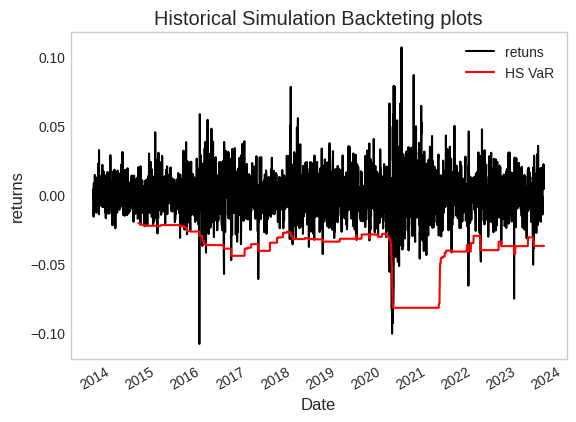

In [ ]:
SA_portfolio_return['Portfolio return'].plot(color='black', label='retuns')
(-SA_HS_1dayVaR*0.01).plot(color='red', label = 'HS VaR')

plt.title('Historical Simulation Backteting plots')
plt.ylabel('returns')
plt.legend(loc='best')
plt.grid(False)
plt.show()

## Backtesting 1 day HS VaR

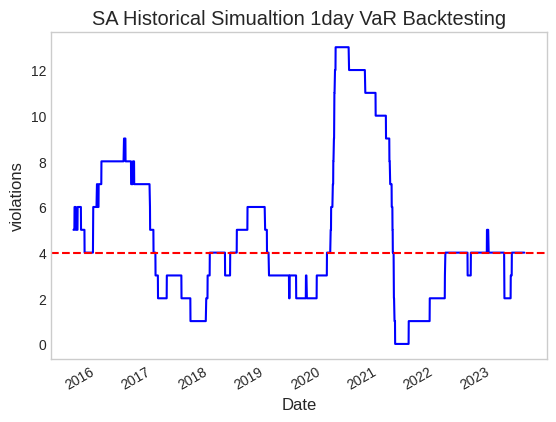

In [ ]:
SA_portfolio_return['Exception'] = np.where((-SA_portfolio_return['1 day HS VaR'].shift(1)< SA_portfolio_return['Portfolio return']*100),0,1)
#US_portfolio_return
window = 262

# Calculate the rolling sum for the next 10 years
rolling_sum = SA_portfolio_return['Exception'][262:].rolling(window=window).sum()

# You can add this rolling_sum as a new column to your DataFrame if needed
SA_portfolio_return['Violations per year'] = rolling_sum

HS_BAck = SA_portfolio_return['Violations per year'][262:]
# Add a horizontal line at y=3
HS_BAck.plot(color = 'blue')
plt.axhline(y=4, color='red', linestyle='--', label='Expected Exception')
plt.title('SA Historical Simualtion 1day VaR Backtesting')
plt.ylabel('violations')
plt.grid(False)
plt.show()


## $\underline{\text{Historical Simulation (HS) Regulatory Market Risk Capital (ZA) of SA portfolio}}$

* **$\textbf{MRC}_t= \text{max}\left(VaR_{t-1},\sum_{t=1}^{60}VaR_{t-60}\right)$**

In [ ]:
import pandas as pd

# Assuming SA_portfolio_return is your DataFrame, and 'Violations per year' is a column in it
# You can replace 'SA_portfolio_return' and 'Violations per year' with your actual DataFrame and column names

# Define a function to calculate 'k' based on the given logic
def calculate_k(violations):
    if violations <= 4:
        return 3
    elif violations == 5:
        return 3.4
    elif violations == 6:
        return 3.5
    elif violations == 7:
        return 3.65
    elif violations == 8:
        return 3.75
    elif violations == 9:
        return 3.85
    else:
        return 4

# Add the 'k' column to your DataFrame using the apply() function
SA_portfolio_return['k'] = SA_portfolio_return['Violations per year'].apply(calculate_k)

# Now, your DataFrame has a new 'k' column based on the specified logic
#SA_portfolio_return[523:]

In [ ]:

# Assuming SA_portfolio_return is your DataFrame, and '1day VcV VaR' is the column of interest
# Replace 'SA_portfolio_return' and '1day VcV VaR' with your actual DataFrame and column names

# Specify the window size for the rolling average (60 values)
window_size = 60

# Calculate the rolling average for the '1day VcV VaR' column
SA_portfolio_return['Rolling_60_Average_VaR'] = SA_portfolio_return['1 day HS VaR'].rolling(window=window_size).mean()


# Now, your DataFrame has a new 'Rolling_Average' column with the rolling average
SA_portfolio_return['HS_MRC'] = np.maximum(SA_portfolio_return['Rolling_60_Average_VaR'] * SA_portfolio_return['k'],SA_portfolio_return['1 day HS VaR'])
HS_MRC = SA_portfolio_return[523:]
HS_MRC

,ABG.JO,NED.JO,PIK.JO,SBK.JO,TFG.JO,Portfolio return,1 day HS VaR,Exception,Violations per year,k,Rolling_60_Average_VaR,HS_MRC
Date,,,,,,,,,,,,
2015-08-05,-0.005909,-0.042432,0.025723,0.004160,-0.007821,-0.005256,2.302456,0,5.0,3.4,2.254583,7.665582
2015-08-06,-0.021759,-0.013371,0.006392,0.008285,-0.013003,-0.006691,2.302456,0,5.0,3.4,2.255835,7.669838
2015-08-07,0.003635,-0.019723,0.009772,-0.006258,0.009966,-0.000521,2.302456,0,5.0,3.4,2.257087,7.674095
2015-08-10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.302456,0,5.0,3.4,2.258339,7.678351
2015-08-11,0.000000,0.002988,-0.005161,0.019782,-0.033928,-0.003264,2.302456,0,5.0,3.4,2.259590,7.682608
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-25,-0.000822,0.003277,0.003377,0.000428,0.027786,0.006809,3.737835,0,4.0,3.0,3.686701,11.060102
2023-07-26,0.015681,0.007708,-0.036241,0.006094,0.031490,0.004946,3.737835,0,4.0,3.0,3.697025,11.091074
2023-07-27,0.017112,0.019879,0.008327,0.020720,0.043585,0.021925,3.737835,0,4.0,3.0,3.707349,11.122047


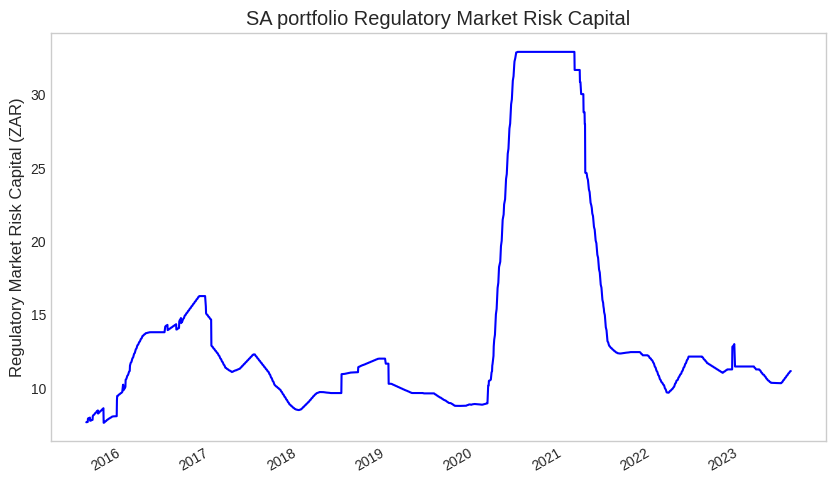

In [ ]:
(SA_portfolio_return['HS_MRC'][523:]).plot(color='blue',figsize=(10,6))
plt.ylabel('Regulatory Market Risk Capital (ZAR)')
plt.title('SA portfolio Regulatory Market Risk Capital')
plt.xlabel('')
plt.grid(False)
plt.show()

## $\underline{Question 2}:$  $\text{10day   simple return under HS approach}$

In [ ]:
def df_10day_portfolio_return(df):
    df_return_10day = df.pct_change(periods=9)
    # Define the dates of the rows you want to remove
    dates_to_remove = [datetime.date(2013, 8, 1), datetime.date(2013, 8, 2), datetime.date(2013, 8, 5),
                       datetime.date(2013, 8, 6), datetime.date(2013, 8, 7),  datetime.date(2013, 8, 8),
                       datetime.date(2013, 8, 9), datetime.date(2013, 8, 12),
                       datetime.date(2013, 8, 13)]
    # Remove rows with the specified dates
    df_return_10day = df_return_10day[~df_return_10day.index.isin(dates_to_remove)]


    returns_weight = [.2,.2,.2,.2,.2]
    df_return_10day['Portfolo return'] = df_return_10day.multiply(returns_weight, axis=1).sum(axis=1)
    return df_return_10day



SA_portfolio_return_10day = df_10day_portfolio_return(SA_portfolio_prices)
SA_portfolio_return_10day

,ABG.JO,NED.JO,PIK.JO,SBK.JO,TFG.JO,Portfolo return
Date,,,,,,
2013-08-14,-0.004252,0.062901,-0.038660,0.025403,-0.038054,0.001468
2013-08-15,-0.019586,0.055710,-0.051282,0.008407,-0.047079,-0.010766
2013-08-16,-0.004976,0.050526,-0.026329,0.010789,0.005652,0.007132
2013-08-19,-0.012820,0.059218,0.014240,0.007869,0.020200,0.017741
2013-08-20,-0.006104,0.051352,0.050959,0.005110,0.043911,0.029046
...,...,...,...,...,...,...
2023-07-25,0.055803,0.023033,-0.057805,0.045081,0.011501,0.015523
2023-07-26,0.053155,0.030230,-0.084583,0.024996,0.055913,0.015942
2023-07-27,0.058301,0.057774,-0.056784,0.046576,0.115936,0.044361


$\underline{Question 3}:$  $\text{10day Historical Simulation   }VaR_{\alpha}(X),$ $\alpha=99\%$

In [ ]:
confidence_level = .99
investment = 100
#SA_portfolio_return_HS_10day = HS_VaR(SA_portfolio_return_10day['Portfolio return'], confidence_level, investment)
SA_portfolio_10_day_VaR = HS_VaR(SA_portfolio_return_10day['Portfolo return'], confidence_level, investment)
SA_portfolio_10_day_VaR = [0.0]*261+SA_portfolio_10_day_VaR
SA_portfolio_return_10day['10 day HS VaR'] = SA_portfolio_10_day_VaR
SA_portfolio_return_10day[261:]

,ABG.JO,NED.JO,PIK.JO,SBK.JO,TFG.JO,Portfolo return,10 day HS VaR
Date,,,,,,,
2014-08-14,-0.000418,0.032747,-0.009490,-0.025260,-0.006545,-0.001793,6.449468
2014-08-15,-0.014319,-0.011098,-0.011054,-0.053215,-0.062321,-0.030401,6.449468
2014-08-18,-0.007471,-0.027280,-0.037559,-0.045824,-0.061224,-0.035872,6.449468
2014-08-19,0.005906,-0.012979,-0.045561,-0.026435,-0.064039,-0.028622,6.449468
2014-08-20,-0.017155,-0.021988,-0.089530,-0.038582,-0.060631,-0.045577,6.449468
...,...,...,...,...,...,...,...
2023-07-25,0.055803,0.023033,-0.057805,0.045081,0.011501,0.015523,11.301271
2023-07-26,0.053155,0.030230,-0.084583,0.024996,0.055913,0.015942,11.301271
2023-07-27,0.058301,0.057774,-0.056784,0.046576,0.115936,0.044361,11.301271


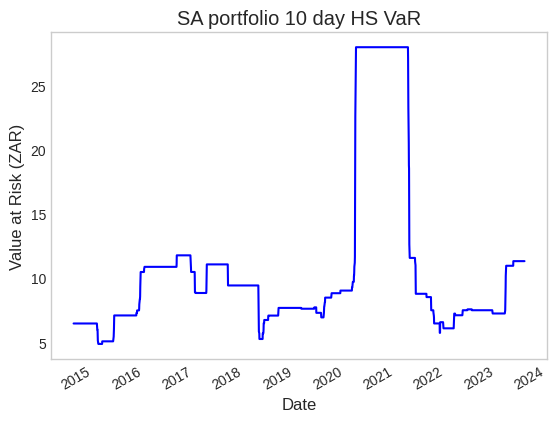

In [ ]:
(SA_portfolio_return_10day['10 day HS VaR'][261:]).plot(color='blue')
plt.ylabel('Value at Risk (ZAR)')
plt.title('SA portfolio 10 day HS VaR')
plt.grid(False)
plt.show()

# $\underline{\text{Section C:}}$$\text{ Varience covarience approach}$

$\underline{\text{Question 1}}:$  $\text{Varience covarience  1day and 10day  Normal  }VaR_{\alpha}(X),$ $\alpha=99\%$

In [ ]:
def vcv_1day_VaR(portfolio_returns, confidence_level ,investment):

    np.random.seed(42)  # for reproducibility

    # Initialize a deque with the first 262 data points
    window_size = 262
    window = deque(portfolio_returns[:window_size])

    # Initialize an empty list to store the calculated percentiles
    percentiles = []

    #  Calculate percentiles for the initial window
    percentile_99 = -stats.norm.ppf(1 - confidence_level)*st.stdev(window)*investment  # 90th percentile
    percentiles.append( percentile_99)

    # Process the rest of the data while sliding the window
    for new_data_point in portfolio_returns[window_size:]:
        old_data_point = window.popleft()  # Remove the last element
        window.append(new_data_point)     # Add the new element

        # Calculate percentiles for the current window
        percentile_99 = -stats.norm.ppf(1 - confidence_level)*st.stdev(window)*investment  # 90th percentile
        percentiles.append(percentile_99)

    # Print or use the list of calculated percentiles as needed
    return percentiles

In [ ]:
# confidence_level = .99
# investment = 100

# HS_1day_VaR_SA = HS_VaR(SA_portfolio_return['Portfolio return'], confidence_level, investment)
# HS_1day_VaR_SA = [0.0*261]+HS_1day_VaR_SA

# SA_portfolio_return['1 day HS VaR'] = HS_1day_VaR_SA
# HS_1day_VaR_SA = SA_portfolio_return['1 day HS VaR'][261:]
# SA_HS_1dayVaR

In [ ]:
SA_portfolio_return = df_portfolio_return(SA_portfolio_prices)

confidence_level = .99
investment = 100



SA_portfolio_return_vcv_1day =  vcv_1day_VaR(SA_portfolio_return['Portfolio return'], confidence_level ,investment)
SA_portfolio_return['1day VcV VaR'] = [0.0]*261+SA_portfolio_return_vcv_1day
SA_VcV_1day_VaR = SA_portfolio_return['1day VcV VaR']
SA_VcV_1day_VaR[261:].head()

Date
2014-08-04    2.308545
2014-08-05    2.308370
2014-08-06    2.312737
2014-08-07    2.300372
2014-08-08    2.299763
Name: 1day VcV VaR, dtype: float64

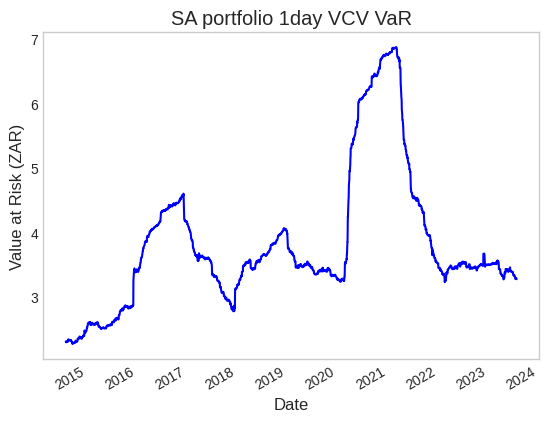

In [ ]:
(SA_VcV_1day_VaR[261:]).plot(color='blue')
plt.ylabel('Value at Risk (ZAR)')
plt.title('SA portfolio 1day VCV VaR')
plt.grid(False)
plt.show()

In [ ]:
plt.style.use('seaborn-whitegrid')

<ipython-input-100-adcf1482bdd0>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


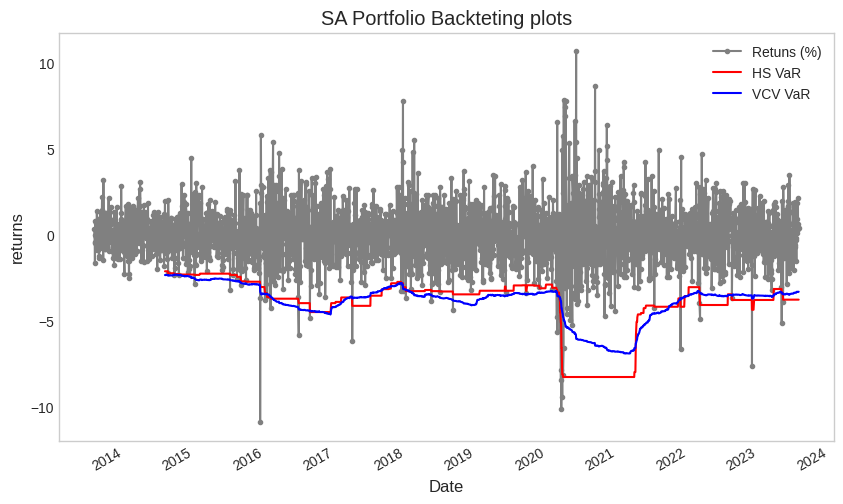

In [ ]:
(SA_portfolio_return['Portfolio return']*100).plot(color='gray', label='Retuns (%)',marker='.',figsize=(10,6))# linestyle='dashed')
(-SA_HS_1dayVaR).plot(color='red', label = 'HS VaR')
(-SA_VcV_1day_VaR[261:]).plot(color='blue', label = 'VCV VaR')

plt.title('SA Portfolio Backteting plots')
plt.ylabel('returns')
plt.legend(loc='best')
plt.grid(False)
plt.show()

In [ ]:
SA_portfolio_return.index

DatetimeIndex(['2013-08-02', '2013-08-05', '2013-08-06', '2013-08-07',
               '2013-08-08', '2013-08-09', '2013-08-12', '2013-08-13',
               '2013-08-14', '2013-08-15',
               ...
               '2023-07-18', '2023-07-19', '2023-07-20', '2023-07-21',
               '2023-07-24', '2023-07-25', '2023-07-26', '2023-07-27',
               '2023-07-28', '2023-07-31'],
              dtype='datetime64[ns]', name='Date', length=2542, freq=None)

Text(0, 0.5, 'Returns (%)')

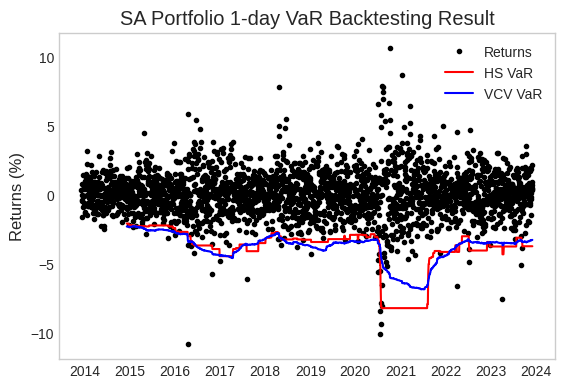

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np


date = SA_portfolio_return.index

# To draw scatter time series plot of the given dataframe
plt.plot_date(date,SA_portfolio_return["Portfolio return"]*100,ms=3, color = 'black', label='Returns')
(-SA_HS_1dayVaR).plot(color='red', label = 'HS VaR')
(-SA_VcV_1day_VaR[261:]).plot(color='blue', label = 'VCV VaR')


# rotating the x-axis tick labels at 30degree towards right
plt.xticks(rotation=30, ha='right')

# Giving title to the chart using plt.title
plt.title('SA Portfolio 1-day VaR Backtesting Result')
plt.legend(loc='best')
# Providing x and y label to the chart
plt.grid(False)
plt.xlabel('')
plt.xticks(rotation=0)
plt.ylabel('Returns (%)')

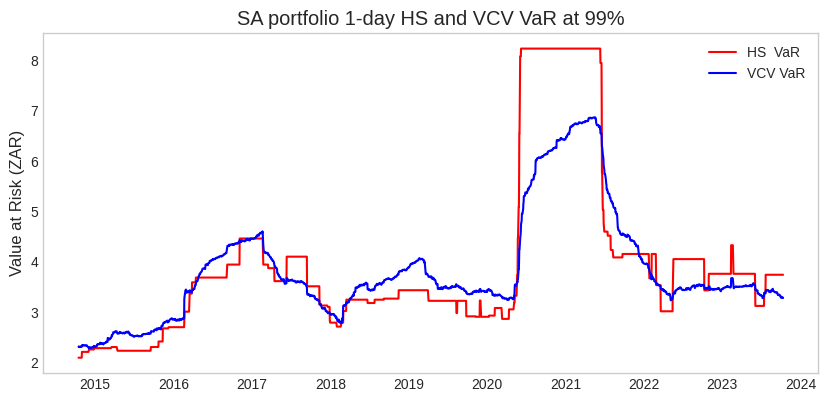

In [ ]:
(SA_HS_1dayVaR).plot(color='red', label = 'HS  VaR')
(SA_VcV_1day_VaR[261:]).plot(color='blue', label = 'VCV VaR',figsize=(10,5))
plt.ylabel('Value at Risk (ZAR)')
plt.title('SA portfolio 1-day HS and VCV VaR at 99%')
plt.legend(loc='best')
plt.grid(False)
plt.xlabel('')
plt.xticks(rotation=0)
plt.show()

## VCV Backtesting

In [ ]:
# SA_portfolio_return['Exception'] = np.where((-SA_portfolio_return['1day VcV VaR'].shift(1)< SA_portfolio_return['Portfolio return']*100),0,1)
# #US_portfolio_return
# window = 262

# # Calculate the rolling sum for the next 10 years
# rolling_sum = SA_portfolio_return['Exception'][261:].rolling(window=window).sum()Section

# # You can add this rolling_sum as a new column to your DataFrame if needed
# SA_portfolio_return['Violations per year'] = rolling_sum

# SA_portfolio_return['Violations per year'][261:].plot(color = 'green', label = 'Exception VCV VaR', figsize = (10,5))
# HS_BAck.plot(color = 'blue', label = 'Exception HS VaR')
# # Add a horizontal line at y=3
# plt.axhline(y=4, color='red', linestyle='--', label='Expected Exception')
# plt.title('SA portfolio 1-day HS VaR and VCV VaR Backtesting violations')
# plt.ylabel('violations')
# plt.xlabel('')
# plt.legend(loc='best')
# plt.xticks(rotation=0)
# plt.grid(False)
# plt.show()


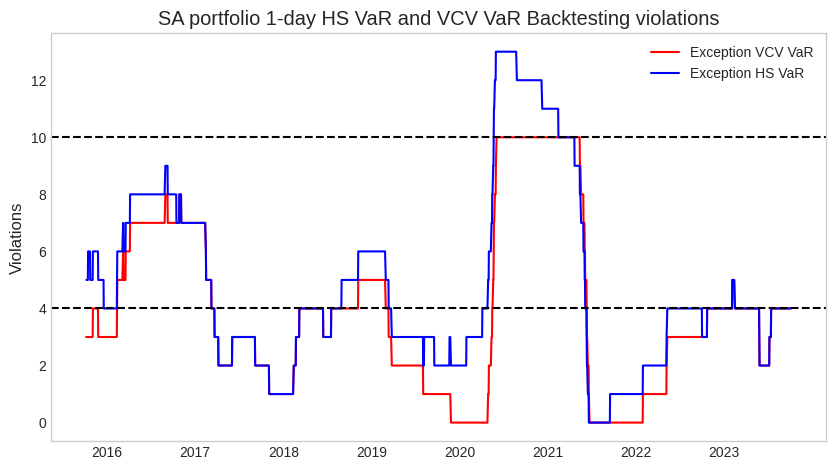

In [ ]:
SA_portfolio_return['Exception'] = np.where((-SA_portfolio_return['1day VcV VaR'].shift(1)< SA_portfolio_return['Portfolio return']*100),0,1)
#US_portfolio_return
window = 262

# Calculate the rolling sum for the next 10 years
rolling_sum = SA_portfolio_return['Exception'][261:].rolling(window=window).sum()

# You can add this rolling_sum as a new column to your DataFrame if needed
SA_portfolio_return['Violations per year'] = rolling_sum

SA_portfolio_return['Violations per year'][261:].plot(color = 'red', label = 'Exception VCV VaR', figsize = (10,6))
HS_BAck.plot(color = 'blue', label = 'Exception HS VaR')
# Add a horizontal line at y=3
plt.axhline(y=4, color='black', linestyle='--')
plt.axhline(y=10, color='black', linestyle='--')
plt.title('SA portfolio 1-day HS VaR and VCV VaR Backtesting violations')
plt.ylabel('Violations')
plt.xlabel('')
plt.legend(loc='best')
plt.xticks(rotation=0)
plt.grid(False)
plt.show()

## $\underline{\text{Varience Covarienc (VCV) Regulatory Market Risk Capital (ZA) for SA portfolio}}$

* **$\textbf{MRC}_t= \text{max}\left(VaR_{t-1},\sum_{t=1}^{60}VaR_{t-60}\right)$**

In [ ]:
SA_portfolio_return['Exception'] = np.where((-SA_portfolio_return['1day VcV VaR'].shift(1)< SA_portfolio_return['Portfolio return']*100),0,1)
#US_portfolio_return
window = 262

# Calculate the rolling sum for the next 10 years
rolling_sum = SA_portfolio_return['Exception'][261:].rolling(window=window).sum()

# You can add this rolling_sum as a new column to your DataFrame if needed
SA_portfolio_return['Violations per year'] = rolling_sum
SA_portfolio_return[261:]

,ABG.JO,NED.JO,PIK.JO,SBK.JO,TFG.JO,Portfolio return,1day VcV VaR,Exception,Violations per year
Date,,,,,,,,,
2014-08-04,0.008534,0.023710,0.011863,0.016955,0.037909,0.019794,2.308545,0,NaN
2014-08-05,0.005917,0.009247,-0.001172,-0.005036,0.003194,0.002430,2.308370,0,NaN
2014-08-06,-0.014059,-0.014827,0.001006,-0.016825,-0.005714,-0.010084,2.312737,0,NaN
2014-08-07,0.001610,-0.000169,-0.006533,-0.002922,-0.014204,-0.004443,2.300372,0,NaN
2014-08-08,-0.006016,0.000000,-0.001854,0.007814,-0.011244,-0.002260,2.299763,0,NaN
...,...,...,...,...,...,...,...,...,...
2023-07-25,-0.000822,0.003277,0.003377,0.000428,0.027786,0.006809,3.280891,0,4.0
2023-07-26,0.015681,0.007708,-0.036241,0.006094,0.031490,0.004946,3.281072,0,4.0
2023-07-27,0.017112,0.019879,0.008327,0.020720,0.043585,0.021925,3.294397,0,4.0


In [ ]:
SA_portfolio_return[522:]

,ABG.JO,NED.JO,PIK.JO,SBK.JO,TFG.JO,Portfolio return,1day VcV VaR,Exception,Violations per year
Date,,,,,,,,,
2015-08-04,0.028151,0.050832,0.023224,0.027217,0.029665,0.031818,2.672357,0,3.0
2015-08-05,-0.005909,-0.042432,0.025723,0.004160,-0.007821,-0.005256,2.659527,0,3.0
2015-08-06,-0.021759,-0.013371,0.006392,0.008285,-0.013003,-0.006691,2.661482,0,3.0
2015-08-07,0.003635,-0.019723,0.009772,-0.006258,0.009966,-0.000521,2.657066,0,3.0
2015-08-10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.656071,0,3.0
...,...,...,...,...,...,...,...,...,...
2023-07-25,-0.000822,0.003277,0.003377,0.000428,0.027786,0.006809,3.280891,0,4.0
2023-07-26,0.015681,0.007708,-0.036241,0.006094,0.031490,0.004946,3.281072,0,4.0
2023-07-27,0.017112,0.019879,0.008327,0.020720,0.043585,0.021925,3.294397,0,4.0


In [ ]:
import pandas as pd

# Assuming SA_portfolio_return is your DataFrame, and 'Violations per year' is a column in it
# You can replace 'SA_portfolio_return' and 'Violations per year' with your actual DataFrame and column names

# Define a function to calculate 'k' based on the given logic
def calculate_k(violations):
    if violations <= 4:
        return 3
    elif violations == 5:
        return 3.4
    elif violations == 6:
        return 3.5
    elif violations == 7:
        return 3.65
    elif violations == 8:
        return 3.75
    elif violations == 9:
        return 3.85
    else:
        return 4

# Add the 'k' column to your DataFrame using the apply() function
SA_portfolio_return['k'] = SA_portfolio_return['Violations per year'].apply(calculate_k)

# Now, your DataFrame has a new 'k' column based on the specified logic
SA_portfolio_return[522:]

,ABG.JO,NED.JO,PIK.JO,SBK.JO,TFG.JO,Portfolio return,1day VcV VaR,Exception,Violations per year,k
Date,,,,,,,,,,
2015-08-04,0.028151,0.050832,0.023224,0.027217,0.029665,0.031818,2.672357,0,3.0,3.0
2015-08-05,-0.005909,-0.042432,0.025723,0.004160,-0.007821,-0.005256,2.659527,0,3.0,3.0
2015-08-06,-0.021759,-0.013371,0.006392,0.008285,-0.013003,-0.006691,2.661482,0,3.0,3.0
2015-08-07,0.003635,-0.019723,0.009772,-0.006258,0.009966,-0.000521,2.657066,0,3.0,3.0
2015-08-10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.656071,0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...
2023-07-25,-0.000822,0.003277,0.003377,0.000428,0.027786,0.006809,3.280891,0,4.0,3.0
2023-07-26,0.015681,0.007708,-0.036241,0.006094,0.031490,0.004946,3.281072,0,4.0,3.0
2023-07-27,0.017112,0.019879,0.008327,0.020720,0.043585,0.021925,3.294397,0,4.0,3.0


In [ ]:

# Assuming SA_portfolio_return is your DataFrame, and '1day VcV VaR' is the column of interest
# Replace 'SA_portfolio_return' and '1day VcV VaR' with your actual DataFrame and column names

# Specify the window size for the rolling average (60 values)
window_size = 60

# Calculate the rolling average for the '1day VcV VaR' column
SA_portfolio_return['Rolling_60_Average_VaR'] = SA_portfolio_return['1day VcV VaR'].rolling(window=window_size).mean()


# Now, your DataFrame has a new 'Rolling_Average' column with the rolling average
SA_portfolio_return['VCV_MRC'] = np.maximum(SA_portfolio_return['Rolling_60_Average_VaR'] * SA_portfolio_return['k'],SA_portfolio_return['1day VcV VaR'])
SA_portfolio_return[522:]

,ABG.JO,NED.JO,PIK.JO,SBK.JO,TFG.JO,Portfolio return,1day VcV VaR,Exception,Violations per year,k,Rolling_60_Average_VaR,VCV_MRC
Date,,,,,,,,,,,,
2015-08-04,0.028151,0.050832,0.023224,0.027217,0.029665,0.031818,2.672357,0,3.0,3.0,2.577094,7.731282
2015-08-05,-0.005909,-0.042432,0.025723,0.004160,-0.007821,-0.005256,2.659527,0,3.0,3.0,2.579517,7.738552
2015-08-06,-0.021759,-0.013371,0.006392,0.008285,-0.013003,-0.006691,2.661482,0,3.0,3.0,2.581937,7.745810
2015-08-07,0.003635,-0.019723,0.009772,-0.006258,0.009966,-0.000521,2.657066,0,3.0,3.0,2.584211,7.752633
2015-08-10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.656071,0,3.0,3.0,2.586584,7.759751
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-25,-0.000822,0.003277,0.003377,0.000428,0.027786,0.006809,3.280891,0,4.0,3.0,3.382731,10.148192
2023-07-26,0.015681,0.007708,-0.036241,0.006094,0.031490,0.004946,3.281072,0,4.0,3.0,3.382400,10.147201
2023-07-27,0.017112,0.019879,0.008327,0.020720,0.043585,0.021925,3.294397,0,4.0,3.0,3.382295,10.146884


In [ ]:
HS_MRC

,ABG.JO,NED.JO,PIK.JO,SBK.JO,TFG.JO,Portfolio return,1 day HS VaR,Exception,Violations per year,k,Rolling_60_Average_VaR,HS_MRC
Date,,,,,,,,,,,,
2015-08-05,-0.005909,-0.042432,0.025723,0.004160,-0.007821,-0.005256,2.302456,0,5.0,3.4,2.254583,7.665582
2015-08-06,-0.021759,-0.013371,0.006392,0.008285,-0.013003,-0.006691,2.302456,0,5.0,3.4,2.255835,7.669838
2015-08-07,0.003635,-0.019723,0.009772,-0.006258,0.009966,-0.000521,2.302456,0,5.0,3.4,2.257087,7.674095
2015-08-10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.302456,0,5.0,3.4,2.258339,7.678351
2015-08-11,0.000000,0.002988,-0.005161,0.019782,-0.033928,-0.003264,2.302456,0,5.0,3.4,2.259590,7.682608
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-25,-0.000822,0.003277,0.003377,0.000428,0.027786,0.006809,3.737835,0,4.0,3.0,3.686701,11.060102
2023-07-26,0.015681,0.007708,-0.036241,0.006094,0.031490,0.004946,3.737835,0,4.0,3.0,3.697025,11.091074
2023-07-27,0.017112,0.019879,0.008327,0.020720,0.043585,0.021925,3.737835,0,4.0,3.0,3.707349,11.122047


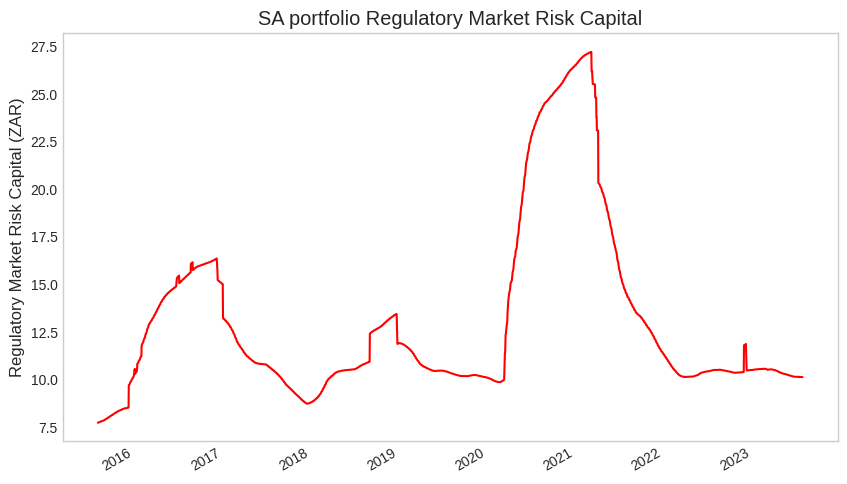

In [ ]:
(SA_portfolio_return['VCV_MRC'][523:]).plot(color='red',figsize=(10,6))
plt.ylabel('Regulatory Market Risk Capital (ZAR)')Section
plt.title('SA portfolio Regulatory Market Risk Capital')
plt.xlabel('')
plt.grid(False)
plt.show()

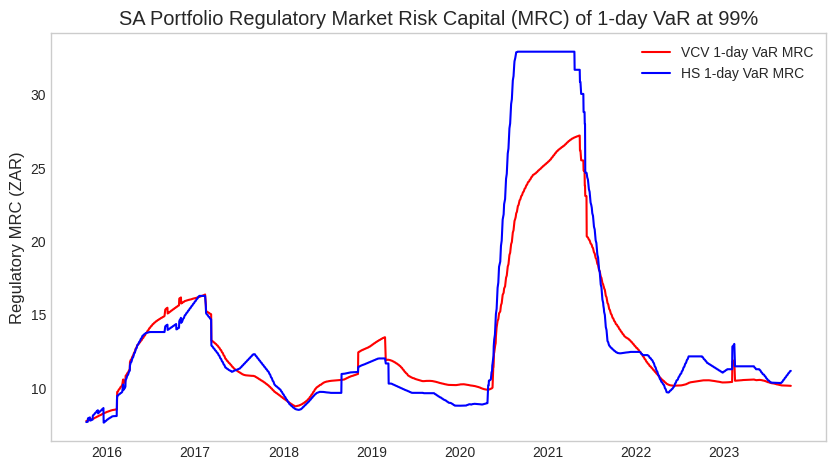

In [ ]:
(SA_portfolio_return['VCV_MRC'][523:]).plot(color='red', label ='VCV 1-day VaR MRC',figsize=(10,6))
HS_MRC['HS_MRC'].plot(color='blue', label ='HS 1-day VaR MRC')
plt.ylabel('Regulatory MRC (ZAR)')
plt.title('SA Portfolio Regulatory Market Risk Capital (MRC) of 1-day VaR at 99%')
plt.legend(loc='best')
plt.grid(False)
plt.xlabel('')
plt.xticks(rotation=0)
plt.show()

$\underline{\text{Question 2}}:$  $\text{Varience covarience  10day  }VaR_{\alpha}(X),$ $\alpha=99\%$

In [ ]:
def vcv_10day_VaR(portfolio_returns, confidence_level ,investment):

    np.random.seed(42)  # for reproducibility

    # Initialize a deque with the first 262 data points
    window_size = 262Section
    window = deque(portfolio_returns[:window_size])

    # Initialize an empty list to store the calculated percentiles
    percentiles = []

    #  Calculate percentiles for the initial window
    percentile_99 = -stats.norm.ppf(1 - confidence_level)*st.stdev(window)*investment*np.sqrt(10)  # 90th percentile
    percentiles.append( percentile_99)

    # Process the rest of the data while sliding the window
    for new_data_point in portfolio_returns[window_size:]:
        old_data_point = window.popleft()  # Remove the last element
        window.append(new_data_point)     # Add the new element

        # Calculate percentiles for the current window
        percentile_99 = -stats.norm.ppf(1 - confidence_level)*st.stdev(window)*investment*np.sqrt(10)  # 90th percentile
        percentiles.append(percentile_99)

    # Print or use the list of calculated percentiles as needed
    return percentiles

In [ ]:
SA_portfolio_return = df_portfolio_return(SA_portfolio_prices)

confidence_level = .99
investment = 100


SA_portfolio_return_vcv_10day = vcv_10day_VaR(SA_portfolio_return['Portfolio return'], confidence_level ,investment)
SA_portfolio_return_vcv_10day = [0.0]*261+SA_portfolio_return_vcv_10day
SA_portfolio_return['1day VcV VaR'] = SA_portfolio_return_vcv_10day
SA_VcV_10day_VaR = SA_portfolio_return['1day VcV VaR']
SA_VcV_10day_VaR[261:].head()

Date
2014-08-04    7.300260
2014-08-05    7.299706
2014-08-06    7.313518
2014-08-07    7.274414
2014-08-08    7.272489
Name: 1day VcV VaR, dtype: float64

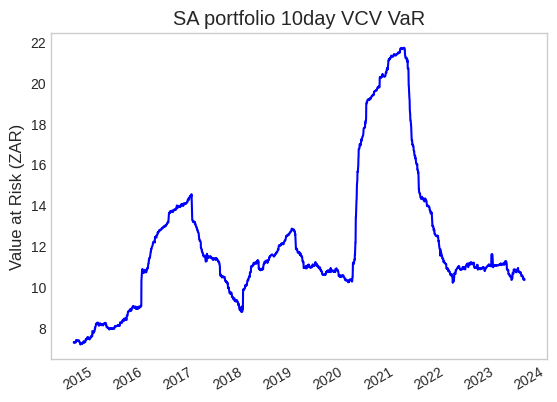

In [ ]:
(SA_VcV_10day_VaR[261:]).plot(color='blue')
plt.ylabel('Value at Risk (ZAR)')
plt.title('SA portfolio 10day VCV VaR')
plt.grid(False)
plt.xlabel('')
plt.show()

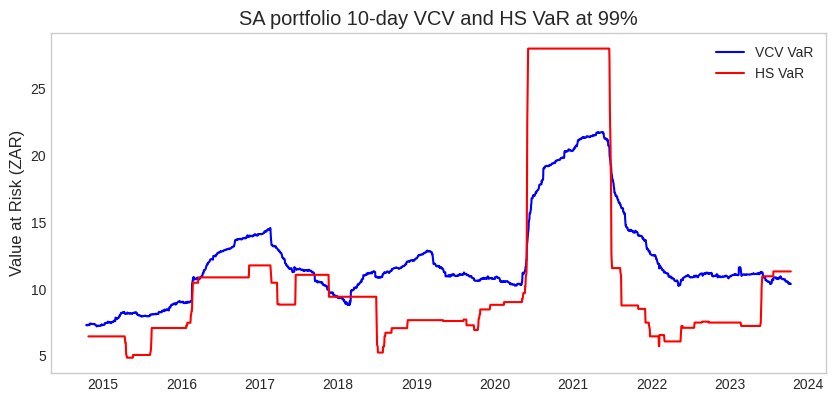

In [ ]:
(SA_VcV_10day_VaR[261:]).plot(color='blue', label = 'VCV VaR',figsize=(10,5))
(SA_portfolio_return_10day['10 day HS VaR'][261:]).plot(color='red', label ='HS VaR')
plt.ylabel('Value at Risk (ZAR)')
plt.title('SA portfolio 10-day VCV and HS VaR at 99%')
plt.legend(loc='best')
plt.grid(False)
plt.xlabel('')
plt.xticks(rotation=0)
plt.show()

In [ ]:
def vcv_1day_VaR(portfolio_returns, confidence_level ,investment):

    np.random.seed(42)  # for reproducibility

    # Initialize a deque with the first 262 data points
    window_size = 262
    window = deque(portfolio_returns[:window_size])

    # Initialize an empty list to store the calculated percentiles
    percentiles = []

    #  Calculate percentiles for the initial window
    percentile_99 = -stats.t.ppf(0.75, 29)*st.stdev(window)*investment  # 90th percentile
    percentiles.append( percentile_99)

    # Process the rest of the data while sliding the window
    for new_data_point in portfolio_returns[window_size:]:
        old_data_point = window.popleft()  # Remove the last element
        window.append(new_data_point)     # Add the new element

        # Calculate percentiles for the current window
        percentile_99 = -stats.norm.ppf(1 - confidence_level)*st.stdev(window)*investment  # 90th percentile
        percentiles.append(percentile_99)

    # Print or use the list of calculated percentiles as needed
    return percentiles

## Comperison of 1day and 10day  VaR at $\alpha=99\%$

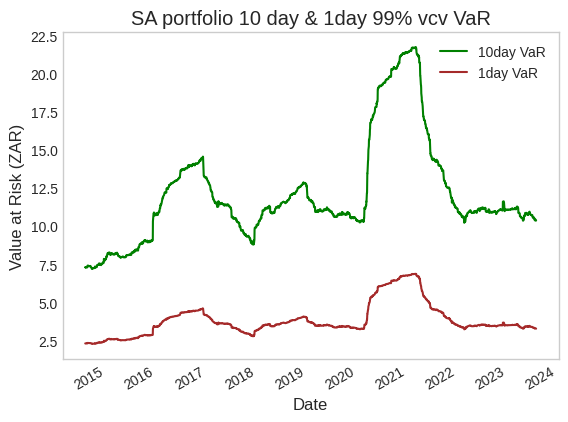

In [ ]:
(SA_VcV_10day_VaR[261:]).plot(color='green', label = '10day VaR')
(SA_VcV_1day_VaR[261:]).plot(color='brown', label = '1day VaR')
plt.ylabel('Value at Risk (ZAR)')
plt.title('SA portfolio 10 day & 1day 99% vcv VaR')
plt.legend(loc='best')
plt.grid(False)
plt.show()

## $\underline{\text{Section C:}}$$\text{ Expected Shortfall for botth HS and VCV methods}$

$\underline{Question 1}:$  $\text{1day Varience Covarience    }ES(X),$ $\alpha=97.5\%$

In [ ]:
def vcv_ES(portfolio_returns, confidence_level ,investment):

    np.random.seed(42)  # for reproducibility

    # Initialize a deque with the first 262 data points
    window_size = 262
    window = deque(portfolio_returns[:window_size])

    # Initialize an empty list to store the calculated percentiles
    percentiles = []

    #  Calculate percentiles for the initial window
    percentile_99 = (1/(1-confidence_level))*(np.std(window)/np.sqrt(2*np.pi))*np.exp(-stats.norm.ppf(1 - confidence_level)**2/2)*investment  # 90th percentile
    #ES = (np.std(window)/np.sqrt(2*np.pi))*np.exp(-stats.norm.ppf(1 - confidence_level)**2/2)*investment
    percentiles.append(percentile_99)

    # Process the rest of the data while sliding the window
    for new_data_point in portfolio_returns[window_size:]:
        old_data_point = window.popleft()  # Remove the last element
        window.append(new_data_point)     # Add the new element

        # Calculate percentiles for the current window
        percentile_99 = (1/(1-confidence_level))*(np.std(window)/np.sqrt(2*np.pi))*np.exp(-stats.norm.ppf(1 - confidence_level)**2/2)*investment  # 90th percentile
        percentiles.append(percentile_99)

    # Print or use the list of calculated percentiles as needed
    return percentiles

In [ ]:
SA_portfolio_return = df_portfolio_return(SA_portfolio_prices)

confidence_level = .975
investment = 100
SA_portfolio_return_VCV_ES = vcv_ES(SA_portfolio_return['Portfolio return'], confidence_level ,investment)
SA_portfolio_return_VCV_ES = [0.0]*261+SA_portfolio_return_VCV_ES
SA_portfolio_return['10day VcV VaR'] = SA_portfolio_return_VCV_ES
SA_VcV_ES = SA_portfolio_return['10day VcV VaR']
SA_VcV_ES[261:]

Date
2014-08-04    2.315481
2014-08-05    2.315305
2014-08-06    2.319686
2014-08-07    2.307283
2014-08-08    2.306672
                ...   
2023-07-25    3.290748
2023-07-26    3.290929
2023-07-27    3.304294
2023-07-28    3.302240
2023-07-31    3.285642
Name: 10day VcV VaR, Length: 2281, dtype: float64

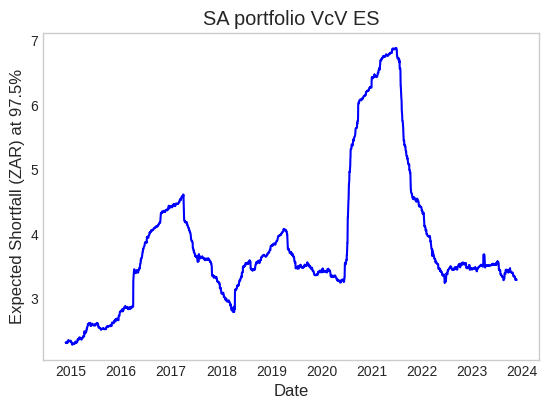

In [ ]:
(SA_VcV_ES[262:]).plot(color='blue')
plt.ylabel('Expected Shortfall (ZAR) at 97.5%')
plt.title('SA portfolio VcV ES')
plt.xticks(rotation=0)
plt.grid(False)
plt.show()

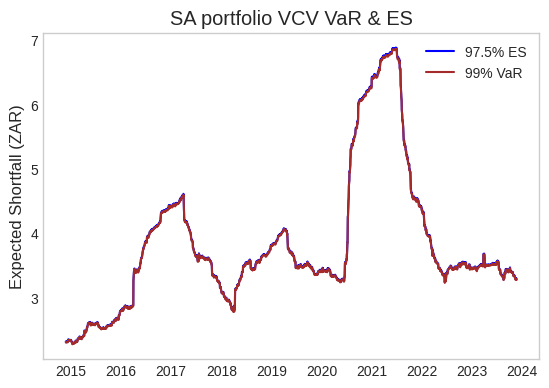

In [ ]:
(SA_VcV_ES[262:]).plot(color='blue', label = '97.5% ES')
(SA_VcV_1day_VaR[261:]).plot(color='brown', label = '99% VaR')
plt.ylabel('Expected Shortfall (ZAR)')
plt.title('SA portfolio VCV VaR & ES')
plt.legend(loc='best')
plt.grid(False)
plt.xlabel('')
plt.xticks(rotation=0)
plt.show()

$\underline{\text{Question 2}}:$ $\text{Historical simulation ES(X) at }\alpha =97.5\% $

The below funtion **HS_daily_expected_shortfall(daily_returns, confidence_level)** calculate the daily Historical Simulation Expected shortfall over a 10 year period using the window length of 262.

In [ ]:
def HS_daily_expected_shortfall(daily_returns, confidence_level):
    """
    Calculate the daily Expected Shortfall (ES) for a given confidence level using a rolling window of 253 days.

    Parameters:
    - daily_returns (list or numpy array): Daily returns data for a specific asset or portfolio.
    - confidence_level (float): The desired confidence level for VaR and ES calculations, e.g., 95 for 95%.

    Returns:
    - daily_es_values (list): List of daily Expected Shortfall values for each day in the input data.
    """

    def expected_shortfall(daily_returns, confidence_level):
        # Calculate the VaR (Value at Risk) at the specified confidence level
        var = np.percentile(daily_returns, 100 - confidence_level)

        # Find all returns worse than VaR
        worse_returns = [ret for ret in daily_returns if ret <= var]

        # Calculate the Expected Shortfall (average of worse returns)
        es = -np.mean(worse_returns)

        return es

    # Initialize parameters
    window_size = 262
    total_days = len(daily_returns)

    # Initialize an empty list to store the ES values
    daily_es_values = []

    for i in range(total_days):
        if i >= window_size:
            # Extract the rolling window of returns
            window_returns = daily_returns[i - window_size:i]

            # Calculate the ES for the window
            es = expected_shortfall(window_returns, confidence_level)

            # Append the ES value to the list
            daily_es_values.append(es)

    return daily_es_values


In [ ]:
investment = 100
SA = SA_portfolio_return["Portfolio return"]*investment
confidence_level = 97.5
SA_portfolio_HS_ES = HS_daily_expected_shortfall(SA, confidence_level)
#Question
SA_portfolio_return['HS Expected Shortfall'] = [0.0]*262 + SA_portfolio_HS_ES

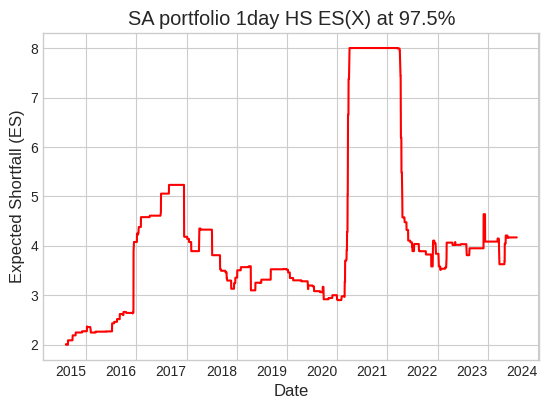

In [ ]:
(SA_portfolio_return['HS Expected Shortfall'][262:]).plot(color='red')
plt.ylabel('Expected Shortfall (ES)')
plt.title('SA portfolio 1day HS ES(X) at 97.5%')
plt.xticks(rotation=0)
plt.show()

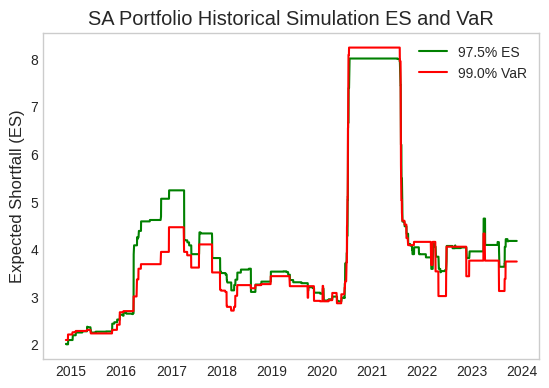

In [ ]:
(SA_portfolio_return['HS Expected Shortfall'][262:]).plot(color='green' , label='97.5% ES')
SA_HS_1dayVaR.plot(color='red', label ='99.0% VaR')
plt.ylabel('Expected Shortfall (ES)')

plt.legend(loc='best')
plt.title('SA Portfolio Historical Simulation ES and VaR')
plt.grid(False)
plt.xlabel('')
plt.xticks(rotation=0)
plt.show()